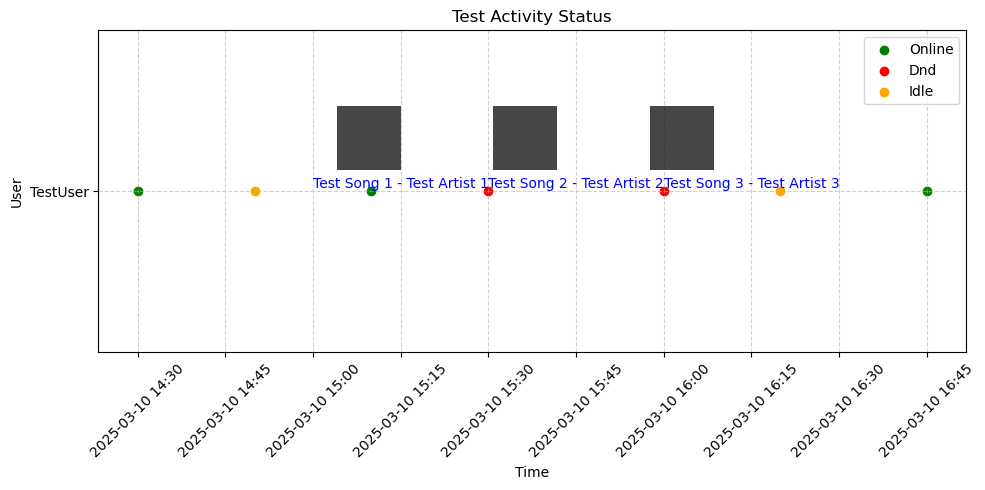

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import requests
from PIL import Image
import os

# Manually defined test timestamps (change these to test!)
timestamps = {
    "online": [
        datetime.datetime(2025, 3, 10, 14, 30),
        datetime.datetime(2025, 3, 10, 15, 10),
        datetime.datetime(2025, 3, 10, 16, 45),
    ],
    "dnd": [
        datetime.datetime(2025, 3, 10, 15, 30),
        datetime.datetime(2025, 3, 10, 16, 0),
    ],
    "idle": [
        datetime.datetime(2025, 3, 10, 14, 50),
        datetime.datetime(2025, 3, 10, 16, 20),
    ],
}

# Simulated Spotify data (change these values to test!)
spotify_data = [
    {
        "timestamp": datetime.datetime(2025, 3, 10, 15, 00),  # When the song was played
        "song": "Test Song 1",
        "artist": "Test Artist 1",
        "cover_path": "test.png"  # Example Spotify image for the first song
    },
    {
        "timestamp": datetime.datetime(2025, 3, 10, 15, 30),  # When the song was played
        "song": "Test Song 2",
        "artist": "Test Artist 2",
        "cover_path": "test.png"  # Example Spotify image for the second song
    },
    {
        "timestamp": datetime.datetime(2025, 3, 10, 16, 00),  # When the song was played
        "song": "Test Song 3",
        "artist": "Test Artist 3",
        "cover_path": "test.png"  # Example Spotify image for the third song
    }
]


# Define status colors
status_colors = {
    "online": "green",
    "dnd": "red",
    "idle": "orange"
}

# Create the figure
plt.figure(figsize=(10, 5))

# Plot each status with different colors
for status, times in timestamps.items():
    if times:
        plt.scatter(times, ["TestUser"] * len(times), color=status_colors[status], label=status.capitalize(), marker="o")

# Formatting
plt.xlabel("Time")
plt.ylabel("User")
plt.title("Test Activity Status")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))  # Format date
plt.grid(True, linestyle="--", alpha=0.6)

# Display song info and album cover if available
for spotify in spotify_data:
    song_time = spotify["timestamp"]  # Get the timestamp
    song_text = f"{spotify['song']} - {spotify['artist']}"
    plt.text(song_time, "TestUser", song_text, fontsize=10, color="blue", verticalalignment='bottom')

    if os.path.exists(spotify["cover_path"]):  # Check if file exists
        img = Image.open(spotify["cover_path"])
        # Convert timestamp to figure coordinates
        x_coord = mdates.date2num(song_time)  # Convert timestamp to x-axis coordinate
        y_coord = ax.get_ylim()[1] + 0.5  # Position slightly above the user label

        # Convert figure coordinates to pixel coordinates
        fig = plt.gcf()
        transform = ax.transData.transform((x_coord, ax.get_ylim()[1]))
        x_pixel, y_pixel = transform[0]+20, transform[1]-120  # Adjust position

        # Display image at the calculated position
        plt.figimage(img, x_pixel, y_pixel, alpha=0.8)
    else:
        print(f"Could not find album cover: {spotify['cover_path']}")

plt.tight_layout()
plt.show()